In [1]:
import pandas as pd

file_path = './Score.csv'

data = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Increase display width to fit data

print(data.head(5))


   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix                 Payment_Behaviour   Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Monthly_Inhand_Salary  Changed_Credit_Limit  Outstanding_Debt  Total_EMI_per_month
0                  3.0                     7.0                   4.0                 26.822620               265.0                    No                80.415295       312.494089         Good       Good  High_spent_Medium_value_payments  23.0       19114.12                3.0              4.0            3.0          4.0            1824.843333                 11.27            809.98            49.574949
1                  3.0                     7.0                   4.0                 31.944960               265.0                    No               118.280222       284.629162         G

In [2]:
print(data.shape)

(99960, 21)


In [3]:
one_hot_encoded_data = pd.get_dummies(data, dtype='int')

print(one_hot_encoded_data.head(10))

   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_Utilization_Ratio  Credit_History_Age  Amount_invested_monthly  Monthly_Balance   Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Monthly_Inhand_Salary  Changed_Credit_Limit  Outstanding_Debt  Total_EMI_per_month  Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  Credit_Score_Good  Credit_Score_Poor  Credit_Score_Standard  Credit_Mix_Bad  Credit_Mix_Good  Credit_Mix_Standard  Payment_Behaviour_High_spent_Large_value_payments  Payment_Behaviour_High_spent_Medium_value_payments  Payment_Behaviour_High_spent_Small_value_payments  Payment_Behaviour_Low_spent_Large_value_payments  Payment_Behaviour_Low_spent_Medium_value_payments  Payment_Behaviour_Low_spent_Small_value_payments
0                  3.0                     7.0                   4.0                 26.822620               265.0                80.415295       312.494089  23.0       19114.

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(one_hot_encoded_data), columns=one_hot_encoded_data.columns)

print(df_normalized.head(10))


   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_Utilization_Ratio  Credit_History_Age  Amount_invested_monthly  Monthly_Balance       Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Monthly_Inhand_Salary  Changed_Credit_Limit  Outstanding_Debt  Total_EMI_per_month  Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  Credit_Score_Good  Credit_Score_Poor  Credit_Score_Standard  Credit_Mix_Bad  Credit_Mix_Good  Credit_Mix_Standard  Payment_Behaviour_High_spent_Large_value_payments  Payment_Behaviour_High_spent_Medium_value_payments  Payment_Behaviour_High_spent_Small_value_payments  Payment_Behaviour_Low_spent_Large_value_payments  Payment_Behaviour_Low_spent_Medium_value_payments  Payment_Behaviour_Low_spent_Small_value_payments
0             0.044776                0.250000              0.137931                  0.227421            0.655087                 0.040669         0.195056  0.214286     

In [5]:
print(df_normalized.shape)

(99960, 32)


In [6]:
x = df_normalized.drop(columns=["Credit_Score_Good", "Credit_Score_Standard", "Credit_Score_Poor"])
y = df_normalized[["Credit_Score_Good", "Credit_Score_Standard", "Credit_Score_Poor"]]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [8]:
x_train.shape

(71971, 29)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(29,)),
    tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
              metrics=["accuracy"])


c:\Users\chandula\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [10]:
history = model.fit(x_train, y_train, verbose=1, epochs=20, validation_data=(x_val, y_val),)

Epoch 1/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6316 - loss: 0.7690 - val_accuracy: 0.6858 - val_loss: 0.6968
Epoch 2/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6962 - loss: 0.6873 - val_accuracy: 0.6971 - val_loss: 0.6932
Epoch 3/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7017 - loss: 0.6788 - val_accuracy: 0.7011 - val_loss: 0.6917
Epoch 4/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7060 - loss: 0.6730 - val_accuracy: 0.6963 - val_loss: 0.6873
Epoch 5/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7072 - loss: 0.6688 - val_accuracy: 0.7034 - val_loss: 0.6832
Epoch 6/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7091 - loss: 0.6651 - val_accuracy: 0.7064 - val_loss: 0.6784
Epoch 7/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7119 - loss: 0.6609 - val_accuracy: 0.7100 - val_loss: 0.6732
Epoch 8/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7137 - loss: 0.6560 - 

In [11]:
model.evaluate(x_test, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7221 - loss: 0.6511


[0.657316267490387, 0.7186874747276306]

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10)):
    """
    This function plots a confusion matrix using the true labels and predicted labels.
    
    Args:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    classes (list): List of label names.
    figsize (tuple): Size of the figure.
    
    Returns:
    None
    """

    cm = confusion_matrix(y_true, y_pred)
   
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)


    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)


    plt.xticks(rotation=45)

    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, f"{cm[i, j]}\n({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color=color,
                 fontsize=10)  

    plt.tight_layout()



625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step


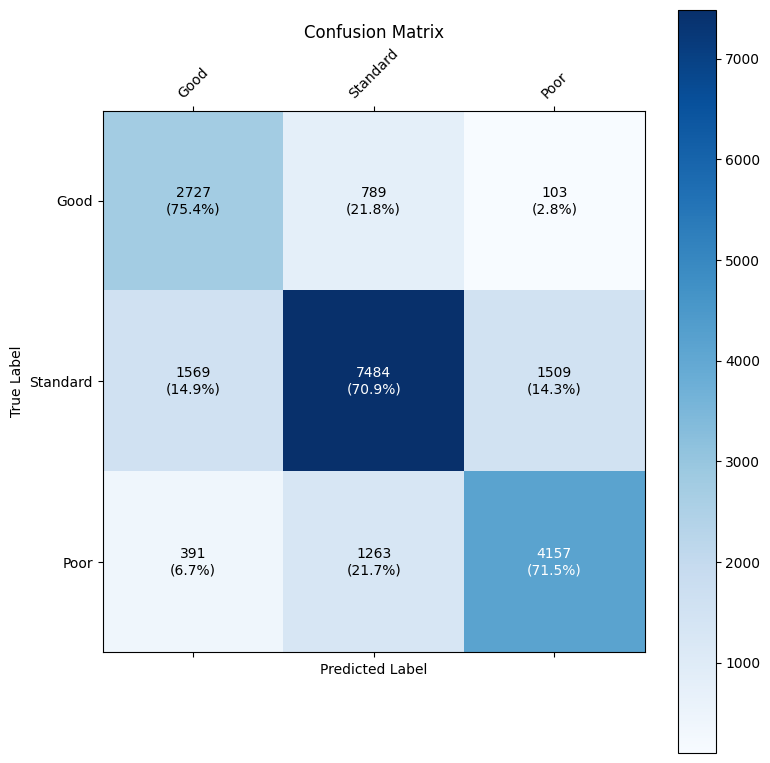

In [13]:
y_preds = model.predict(x_test)

predicted_class_index = tf.argmax(y_preds, axis=1).numpy()

true_class_indices = np.argmax(y_test, axis=1)

class_names = ['Good', 'Standard', 'Poor']

make_confusion_matrix(true_class_indices, predicted_class_index, classes=class_names, figsize=(8, 8))

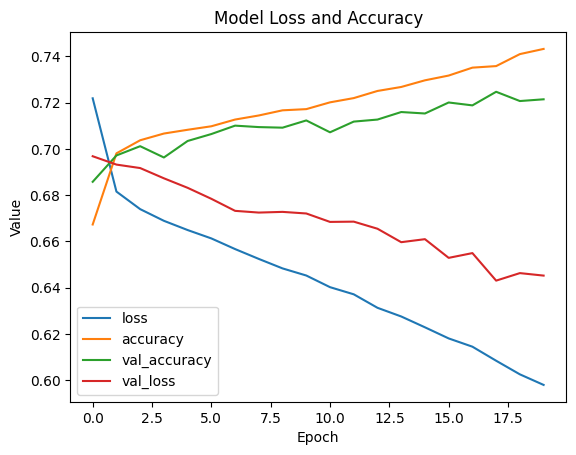

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame({
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy':history.history['val_accuracy'],
    'val_loss': history.history['val_loss'] 
})

# Plot the loss and accuracy
history_df.plot(title="Model Loss and Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()


In [15]:
#use this cell to make predictions


import numpy as np


row = x_test.iloc[78]

print(row.name)

row_array = np.array(row).reshape(1, 29)


predictions = model.predict(row_array)
print(predictions)

highest_prediction = tf.argmax(predictions, axis=1).numpy()

highest_prediction_index_number = int(highest_prediction[0])

print(highest_prediction)
print(f"predicted credit score: {class_names[highest_prediction_index_number]}")

77036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.09262835 0.84483844 0.06253321]]
[1]
predicted credit score: Standard


In [17]:
#use to check the prediction

y_test.iloc[78]

Credit_Score_Good        0.0
Credit_Score_Standard    1.0
Credit_Score_Poor        0.0
Name: 77036, dtype: float64